# Music Genres - Clustering

## Introduction

## Müzik Türlerini Kümeleme Projesi
Bu proje, müzik türlerini ses özelliklerine göre kümelemek için makine öğrenimi tekniklerini kullanmaktadır. Her bireyin müzik zevki farklıdır ve yaşam tarzı veya hobileriyle müzik tercihlerini tahmin etmek zordur. Müzik akış uygulamaları, kullanıcıların dinleme alışkanlıklarını analiz ederek benzer müzik önerileri sunabilir.

Bu projede, Spotify'dan alınan popüler şarkılar içeren bir veri seti ile çalışacağız. Veri setinde sanatçılar, şarkı isimleri ve her müziğin ses özellikleri yer almaktadır. Amacımız, bu özellikler temelinde müzik türlerini benzerliklerine göre gruplamaktır.

Proje, gerekli Python kütüphanelerini ve veri setini yükleyerek başlayacaktır.

## Data Dictionary

Bu veri kümesi, müzik parçalarının çeşitli özelliklerini içermektedir. Aşağıda her bir sütunun anlamı açıklanmaktadır.

| Sütun Adı            | Açıklama                                                                                                                                       |
|----------------------|------------------------------------------------------------------------------------------------------------------------------------------------|
| **Index**            | Her bir müzik parçası için benzersiz bir tanımlayıcı.                                                                                         |
| **Title**            | Müzik parçasının başlığı.                                                                                                                    |
| **Artist**           | Müzik parçasını icra eden sanatçı veya grup.                                                                                                  |
| **Top Genre**        | Müzik parçasının en çok ait olduğu tür.                                                                                                       |
| **Year**             | Müzik parçasının yayınlandığı yıl.                                                                                                           |
| **Beats Per Minute** | Parçanın dakikada vuruş sayısını (BPM) belirtir. Daha yüksek BPM, genellikle daha hızlı bir tempo anlamına gelir.                           |
| **Energy**           | Parçanın enerji seviyesini (0-100 arası) gösterir. Yüksek enerji, genellikle daha hareketli ve canlı müzikleri ifade eder.                   |
| **Danceability**     | Parçanın dans edilebilirlik seviyesini (0-100 arası) belirtir. Yüksek dans edilebilirlik, müziğin ritmik ve hareketli olduğunu gösterir.      |
| **Loudness**         | Parçanın ses yüksekliğini (dB cinsinden) belirtir. Negative değerler, parçanın ortalama ses düzeyinin düşük olduğunu gösterir.                 |
| **Liveness**         | Parçanın canlı bir ortamda kaydedilip kaydedilmediğini gösterir. Yüksek değerler, canlı performans izlenimi yaratır.                          |
| **Valence**          | Parçanın duygusal içeriğini (0-100 arası) gösterir. Yüksek valans, genellikle daha pozitif ve neşeli bir müziği ifade eder.                  |
| **Length**           | Müzik parçasının süresi (saniye cinsinden).                                                                                                   |
| **Acousticness**     | Parçanın akustik enstrümanlar içermesi olasılığını (0-100 arası) belirtir. Yüksek değerler, daha az elektronik müzik anlamına gelir.         |
| **Speechiness**      | Parçanın konuşma içeriği (0-100 arası) belirtir. Yüksek değerler,

## Import Packet

In [6]:
import pandas as pd  
import numpy as np  
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt 
import seaborn as sns 
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None) 
pd.set_option('display.max_rows', None)


## Import Data

In [8]:
df = pd.read_csv("Spotify-2000.csv")

In [9]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [10]:
df.shape

(1994, 15)

In [11]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [13]:
df['Length (Duration)'].unique()

array(['201', '207', '341', '269', '256', '247', '257', '366', '223',
       '290', '162', '232', '214', '639', '173', '236', '288', '276',
       '352', '296', '218', '176', '197', '261', '270', '298', '259',
       '306', '310', '211', '186', '185', '264', '202', '263', '266',
       '629', '177', '237', '278', '331', '355', '213', '234', '216',
       '275', '467', '243', '219', '305', '215', '144', '195', '240',
       '357', '297', '281', '273', '212', '279', '249', '229', '394',
       '375', '226', '210', '258', '283', '231', '268', '403', '321',
       '217', '308', '206', '208', '242', '326', '199', '225', '193',
       '302', '294', '238', '433', '324', '154', '245', '248', '311',
       '272', '289', '253', '181', '184', '203', '280', '146', '196',
       '204', '602', '353', '189', '423', '233', '135', '141', '241',
       '262', '346', '319', '284', '501', '287', '170', '187', '171',
       '414', '252', '209', '364', '246', '235', '161', '274', '286',
       '172', '404',

In [14]:
df = df.replace(',', '', regex=True)

In [15]:
df['Length (Duration)'] = pd.to_numeric(df['Length (Duration)'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

<Axes: >

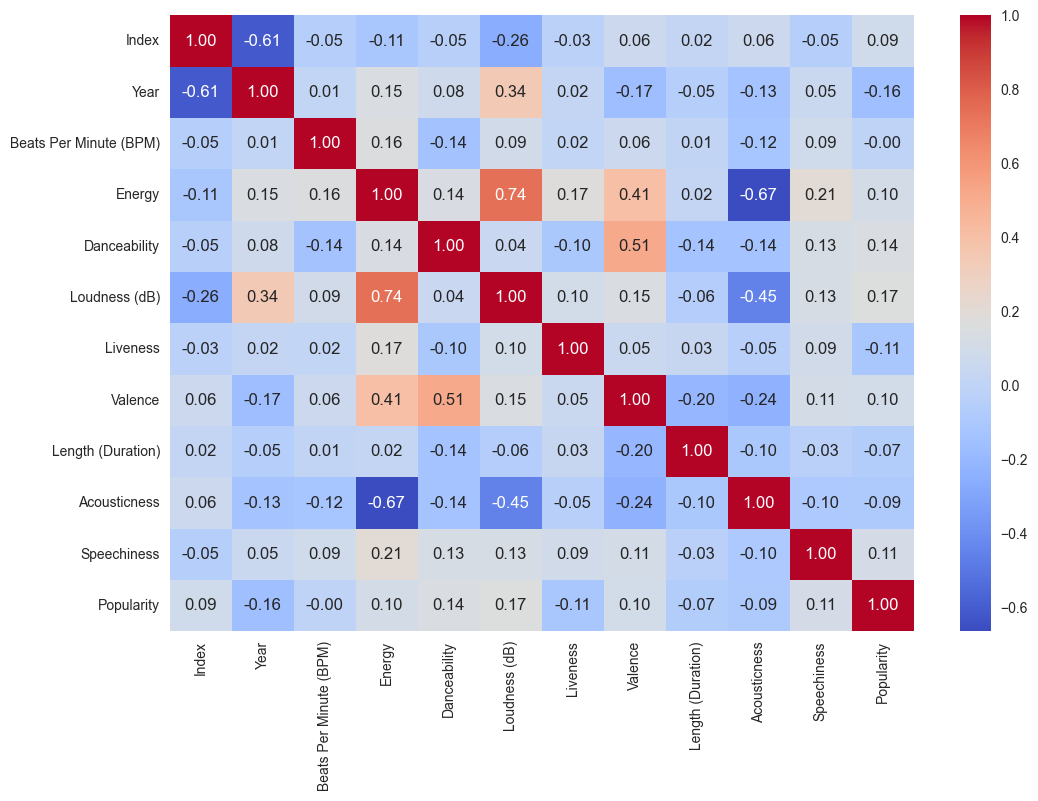

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

In [18]:
df.drop(columns=["Index", "Title", "Artist"], inplace=True)

In [19]:
features = [
    "Beats Per Minute (BPM)", "Energy", "Danceability", "Loudness (dB)",
    "Liveness", "Valence", "Length (Duration)", "Acousticness", "Speechiness", "Popularity"
]
X = df[features]

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Optimum küme sayısını belirleme (Elbow Method)
inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

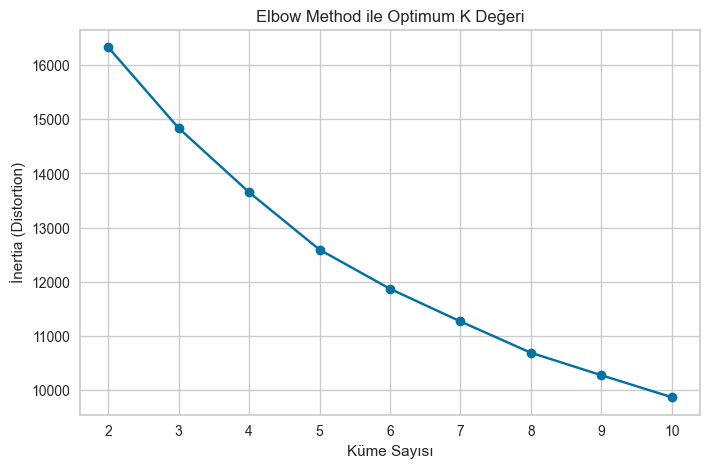

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('İnertia (Distortion)')
plt.title('Elbow Method ile Optimum K Değeri');

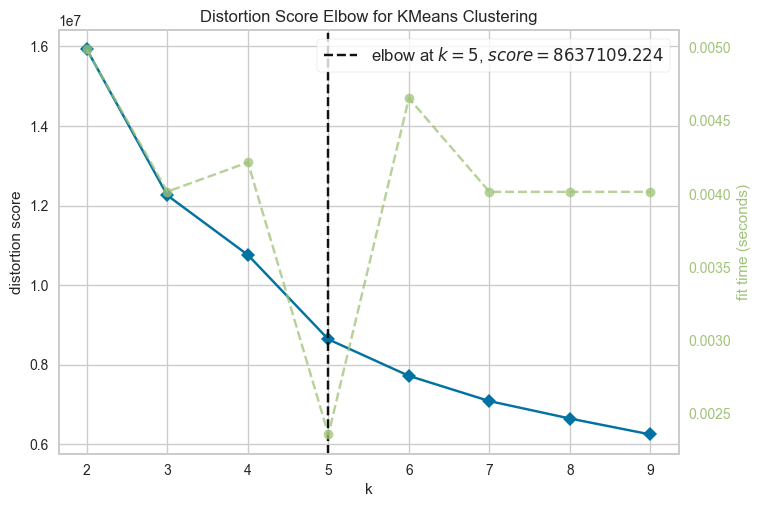

In [23]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(X)
vis.show();

In [24]:
model=KMeans(7)
model=model.fit(X)
predicted=model.predict(X)

In [25]:
silhouette_score(X,predicted)

0.18149862576768241

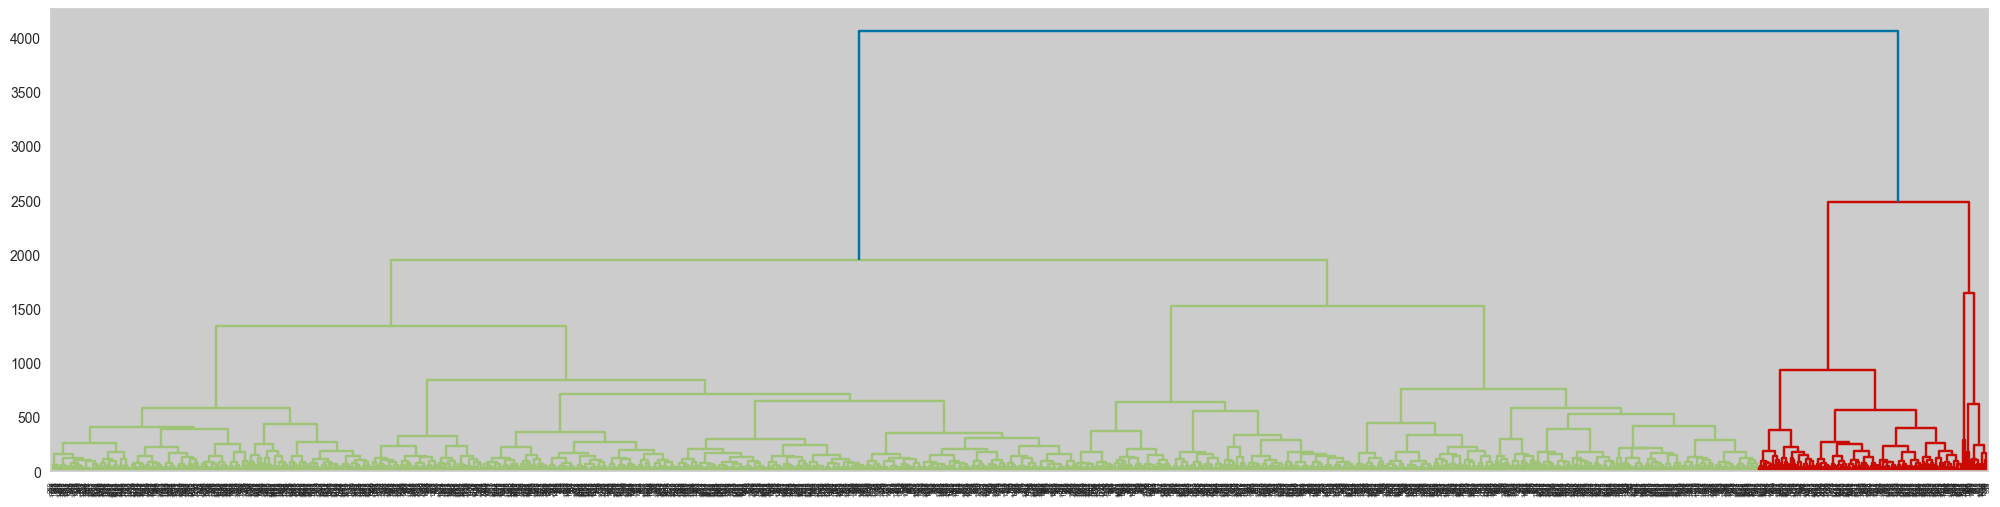

In [26]:
data=linkage(X,method='ward',metric='euclidean')
plt.figure(figsize=(25,6))
dendrogram(data);

In [27]:
sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

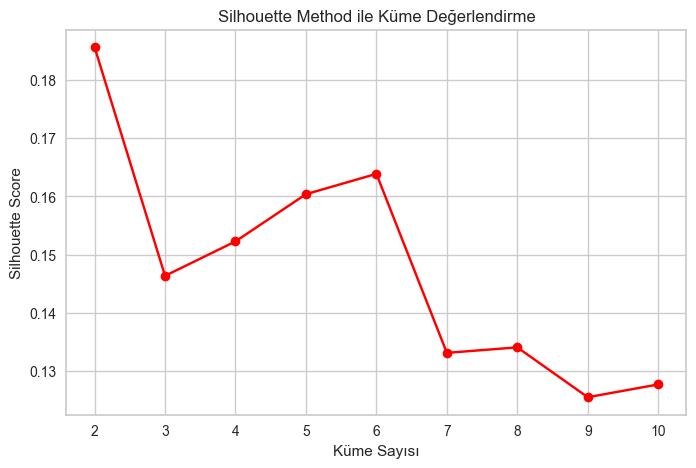

In [28]:
sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_values, sil_scores, marker='o', color='red')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method ile Küme Değerlendirme');
optimal_k = 5  # Elbow ve Silhouette skorlarına göre seçilebilir
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


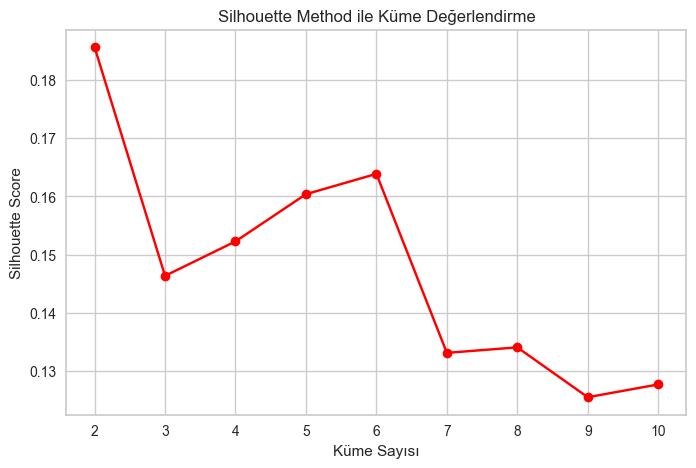

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, sil_scores, marker='o', color='red')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method ile Küme Değerlendirme');

In [30]:
optimal_k = 5  # Elbow ve Silhouette skorlarına göre seçilebilir
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [31]:
# PCA ile boyut azaltma (2D görselleştirme)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

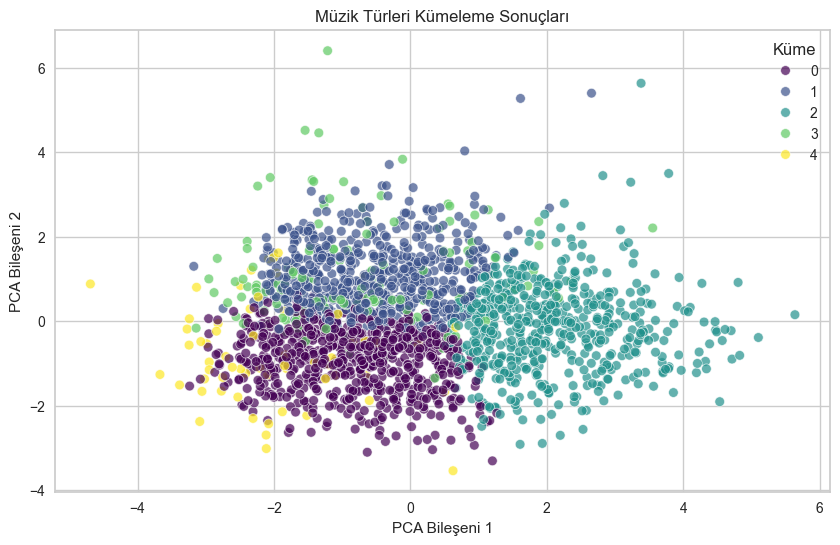

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel('PCA Bileşeni 1')
plt.ylabel('PCA Bileşeni 2')
plt.title('Müzik Türleri Kümeleme Sonuçları')
plt.legend(title='Küme');

In [33]:
df.groupby("Cluster").mean(numeric_only=True)

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,PCA1,PCA2
Cluster,,,,,,,,,,,,,
0,1990.904620,116.283159,67.114754,65.362146,-8.572280,14.856930,72.409836,240.229508,20.812221,4.402385,62.818182,-0.857377,-0.965786
1,1997.084034,130.794958,71.784874,44.964706,-6.983193,16.957983,37.042017,286.509244,10.102521,4.642017,58.369748,-0.548644,1.072037
2,1990.171053,112.729323,32.851504,46.796992,-12.255639,14.176692,31.071429,263.009398,61.656015,3.640977,57.214286,2.106384,-0.166797
3,1993.791045,119.201493,69.820896,49.522388,-8.134328,68.783582,55.947761,270.082090,26.873134,5.932836,53.567164,-0.695573,1.074010
4,1998.822581,127.677419,71.322581,64.725806,-7.193548,17.612903,62.370968,250.532258,18.790323,24.387097,67.725806,-2.026559,-0.725820


In [34]:
# Küme sayısını alalım
n_clusters = df["Cluster"].nunique()
X = df.drop(columns=["Top Genre", "Cluster"])  # Kümeleme için kullanılan özellikler

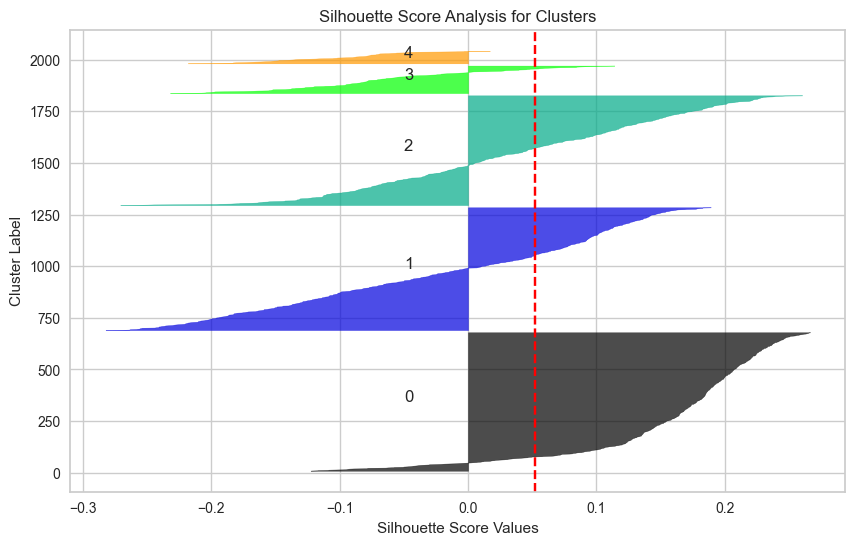

In [35]:
# Silhouette Skorlarını Hesapla
silhouette_avg = silhouette_score(X, df["Cluster"])
sample_silhouette_values = silhouette_samples(X, df["Cluster"])

fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[df["Cluster"] == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Score Analysis for Clusters")
ax.set_xlabel("Silhouette Score Values")
ax.set_ylabel("Cluster Label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--");

In [36]:
import joblib

# Modelinizi kaydetme
joblib.dump(model, 'music_clustering_model.pkl')

['music_clustering_model.pkl']

## Conclusion:
+ Kümeleme sonucunda {n_clusters} farklı müzik kümesi elde edilmiştir.
+ Küme 0: Yüksek dans edilebilirlik ve BPM değerlerine sahip şarkılar içeriyor.
+ Küme 1: Daha akustik, düşük enerji seviyesine sahip şarkılar yoğunlukta.
+ Küme 2: Popüler ve enerjik parçaların toplandığı bir küme.
+ Küme 3: Daha düşük popülerliğe sahip, deneysel veya niş müzikler içeriyor.
+ Kümeleme analizi, müzik türleri arasında belirli bir yapısal ayrım olduğunu göstermektedir.